In [4]:
import gspread

In [2]:
s = ["Step 1: Define Problem Statement",
"Step 2: Data Collection",
"Step 3: Data Quality Check and Remediation",
"Step 4: Exploratory Data Analysis",
"Step 5: Machine learning Modeling",
"Step 6: Evaluation",
"Step 7: Data Communication",
"Step 8: Deploy model"]
s.sort()

In [3]:
s

['Step 1: Define Problem Statement',
 'Step 2: Data Collection',
 'Step 3: Data Quality Check and Remediation',
 'Step 4: Exploratory Data Analysis',
 'Step 5: Machine learning Modeling',
 'Step 6: Evaluation',
 'Step 7: Data Communication',
 'Step 8: Deploy model']

In [5]:
import pandas as pd
import gspread
from oauth2client.service_account import ServiceAccountCredentials

# Define the scope
scope = ['https://spreadsheets.google.com/feeds','https://www.googleapis.com/auth/drive']

# Add credentials to the account
creds = ServiceAccountCredentials.from_json_keyfile_name('data-science-bootcamp-roadmap-c697bad66df1.json', scope)

# Authorize the clientsheet 
client = gspread.authorize(creds)

# Open the spreadhseet
sheet = client.open('Bootcamp TOC')

# Get the first sheet of the Spreadsheet
worksheet = sheet.get_worksheet(0)

# Get all the records of the data
data = worksheet.get_all_records()

# Convert to a DataFrame
df = pd.DataFrame(data)

# Show DataFrame
#df

FileNotFoundError: [Errno 2] No such file or directory: 'data-science-bootcamp-roadmap-c697bad66df1.json'

In [91]:
labels = ["Bootcamp"]
parents = [""]
values = [df.shape[0]]
temp_1 = df.groupby(['general_type'], as_index=False).count()[['general_type','#Day']]
labels.extend(list(temp_1['general_type'].values))
values.extend(list(temp_1['#Day'].values))
parents.extend(["Bootcamp"]*temp_1.shape[0])
temp_2 = df.groupby(['general_type', 'type'], as_index=False).count()[['general_type', 'type','#Day']]
labels.extend(list(temp_2['type'].values))
parents.extend(list(temp_2['general_type'].values))
values.extend(list(temp_2['#Day'].values))
print(labels)
print(parents)
print(values)

['Bootcamp', 'Activity', 'Assessment', 'Practical exercise ', 'Session', 'Usecase', 'Interactive Activity', 'Jeopardy Activity', 'Penguin Activity', 'Self Assessment', 'Hands-on_Session', 'Lab', 'Main_session', 'Side_session', 'Usecase', 'Usecase - Lab', 'Usecase - Project']
['', 'Bootcamp', 'Bootcamp', 'Bootcamp', 'Bootcamp', 'Bootcamp', 'Activity', 'Activity', 'Activity', 'Assessment', 'Practical exercise ', 'Practical exercise ', 'Session', 'Session', 'Usecase', 'Usecase', 'Usecase']
[110, 7, 1, 11, 39, 52, 5, 1, 1, 1, 6, 5, 35, 4, 24, 18, 10]


In [83]:
df.groupby(['general_type', 'type'], as_index=False).count()[['general_type', 'type','#Day']]

,general_type,type,#Day
0,Activity,Interactive Activity,5
1,Activity,Jeopardy Activity,1
2,Activity,Penguin Activity,1
3,Assessment,Self Assessment,1
4,Practical exercise,Hands-on_Session,6
5,Practical exercise,Lab,5
6,Session,Main_session,35
7,Session,Side_session,4
8,Usecase,Usecase,24
9,Usecase,Usecase - Lab,18


In [82]:
level_1 = df.groupby(['general_type'], as_index=False).count()[['general_type','#Day']]

,general_type,#Day
0,Activity,7
1,Assessment,1
2,Practical exercise,11
3,Session,39
4,Usecase,52


In [94]:

s = df.groupby('type', as_index=False).count()[['type','#Day']]
s

,type,#Day
0,Hands-on_Session,6
1,Interactive Activity,5
2,Jeopardy Activity,1
3,Lab,5
4,Main_session,35
5,Penguin Activity,1
6,Self Assessment,1
7,Side_session,4
8,Usecase,24
9,Usecase - Lab,18


In [46]:
def split_text_column(df, text_col):
    # Split the text column and create a new DataFrame
    df = df[['Date', 'Title','type', text_col]]
    splitted_df = (
    df.set_index(['Date', 'Title', 'type'])
    .apply(lambda x: x.str.split(',').explode())  # Split and explode the 'text' column
    .reset_index()  # Reset the index to bring 'id' and 'other_column' back to columns
    )
    return splitted_df

In [ ]:
go.Sunburst(

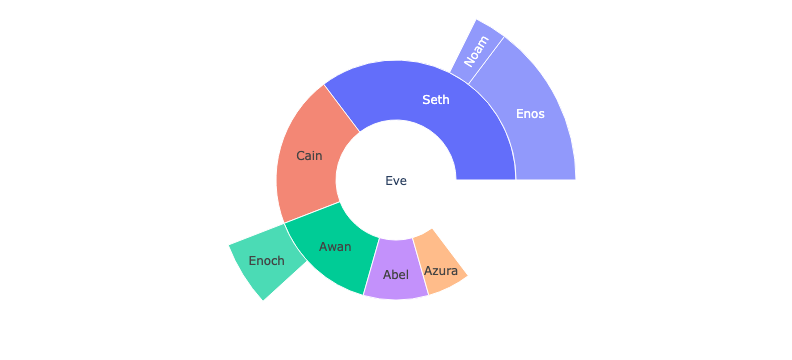

In [92]:
import plotly.graph_objects as go

fig =go.Figure(go.Sunburst(
    labels=["Eve", "Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"],
    parents=["", "Eve", "Eve", "Seth", "Seth", "Eve", "Eve", "Awan", "Eve" ],
    values=[10, 14, 12, 10, 2, 6, 6, 4, 4],
))
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

fig.show()

In [53]:
toc_df = split_text_column(df, 'Skill')
toc_df[toc_df['Skill']=='Data Science Methodology & Literacy']

,Date,Title,type,Skill
2,2024-04-21,Intro to data science,Main_session,Data Science Methodology & Literacy
3,2024-04-21,Data proficiency evaluation,Assessment,Data Science Methodology & Literacy


In [51]:
df.columns

Index(['#Week', '#Day', 'Date', 'seq', 'Title', 'Description', 'More_Details',
       'Objective', 'type', 'Link', 'Phase', 'Skill', 'DS_step'],
      dtype='object')

In [33]:
df[df['type'] == 'Main_session']

,#Week,#Day,Date,seq,Title,Description,More_Details,Objective,type,Link,Phase,Skill,DS_step
2,1,1,21/4/2024,3,Intro to data science,Provide a foundational overview of data scienc...,,,Main_session,,Preparation Phase,Data Science Methodology & Literacy,Step 1: Define Problem Statement
7,1,2,22/4/2024,1,Version Control with Git,A Beginner's Guide to Version Control and Coll...,,- Understand the basics of Git for version con...,Main_session,,Preparation Phase,Software engineering,Step 8: Deploy a model
11,1,3,23/4/2024,1,Python fundamental,Explore the core concepts of Python in this fo...,,- Introduce Python syntax and basic programmin...,Main_session,,Preparation Phase,Programming,Step 3: Data Quality Check and Remediation
17,1,5,25/4/2024,1,Numpy,This lesson gently guides you through the basi...,,- Grasp the fundamentals of NumPy arrays and t...,Main_session,,Preparation Phase,"Programming, Data Manipulation and Analysis (w...","Step 3: Data Quality Check and Remediation, St..."
23,2,1,28/4/2024,2,Pandas,This lesson introduces the key features of Pan...,,- Familiarize yourself with Pandas Series and ...,Main_session,,Preparation Phase,"Programming, Data Manipulation and Analysis (w...","Step 3: Data Quality Check and Remediation, St..."
27,2,2,29/4/2024,1,Intro to Exploratory data analysis (EDA),Dive into the essentials of Exploratory Data A...,,- Understand EDA concepts and techniques.\n- A...,Main_session,,Usecases Phase,Data Manipulation and Analysis (working with d...,"Step 3: Data Quality Check and Remediation, St..."
32,2,3,30/4/2024,3,Data Visualisation,Explore the various types of data visualizatio...,when reach part of detecting outliers in data ...,- Grasp the significance of data visualization...,Main_session,,Usecases Phase,"Data visualization, Data Manipulation and Anal...","Step 4: Exploratory Data Analysis, Step 7: Dat..."
35,2,4,1/5/2024,2,Intro to Statistics,Learn the foundational principles of statistics,,- Understand the basic concepts of descriptive...,Main_session,,Usecases Phase,"Statistics, Data Manipulation and Analysis (wo...",Step 4: Exploratory Data Analysis
38,2,5,2/5/2024,2,Multivariate Analysis,Dive into the complexities of examining patter...,,- Understand the fundamental principles and me...,Main_session,,Usecases Phase,"Data visualization, Data Manipulation and Anal...",Step 4: Exploratory Data Analysis
42,3,1,3/5/2024,2,Data Communication,learn how to communicate complex data insights...,The rest oof data visulization pdf (best pract...,- Understand the principles of effective data ...,Main_session,,Usecases Phase,"Data visualization, Data Manipulation and Anal...","Step 4: Exploratory Data Analysis, Step 7: Dat..."


In [28]:
list(df.groupby(['#Week', '#Day', 'Date']))

[((1, 1, '4/21/2024'),
     #Week  #Day       Date  seq                         Title  \
  0      1     1  4/21/2024    1             Intro to bootcamp   
  1      1     1  4/21/2024    2          ice-breaker exercise   
  2      1     1  4/21/2024    3        Intro to data science    
  3      1     1  4/21/2024    4   Data proficiency evaluation   
  4      1     1  4/21/2024    5      Student Information Form   
  5      1     1  4/21/2024    6                 Class Roadmap   
  6      1     1  4/21/2024    7  Setup and Installation Guide   
  
                                           Description More_Details Objective  \
  0  \n- Welcome from the Instructors\n- Bootcamp O...                          
  1  To warm up the atmosphere and encourage partic...   Names tags             
  2  Provide a foundational overview of data scienc...                          
  3  An evaluation crafted to determine a student's...                          
  4                                      

In [27]:
from datetime import datetime
import re
datetime(2024, 3, 26)

datetime.datetime(2024, 3, 26, 0, 0)